In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from hypothesis.distribution import MixtureOfNormals
from torch.distributions.normal import Normal

In [73]:
def forward_model(theta, arguments):
    with torch.no_grad():
        modes = arguments['modes'].split(",")
        modes = [Normal(float(x), theta.item()) for x in modes]
        mixing_coefficients = arguments['mixing_coefficients'].split(",")
        mixing_coefficients = [float(x) for x in mixing_coefficients]

        dist = MixtureOfNormals(modes, mixing_coefficients)
        samples = []
        for i in range(arguments['observations']):
            samples.append(dist.sample())
        samples = torch.FloatTensor(samples).view(-1, 1)

    return samples

In [74]:
arguments = {}
arguments['modes'] = "-5, 0, 5"
arguments['mixing_coefficients'] = "0.4, 0.2, 0.4"
arguments['observations'] = 50

In [75]:
samples = forward_model(torch.Tensor([1]), arguments)

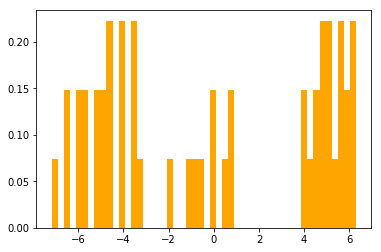

In [76]:
plt.hist(samples.numpy(), bins=50, density=True, color='orange')
plt.show()

In [77]:
from math import pi, e, pow, sqrt

def k(x):
    return (1/(sqrt(2*pi))) * pow(e, -(pow(x, 2) / 2 ) )

def kde(samples, x, h):
    sum = 0
    for sample in samples:
        sum += k((x - sample) / h)
    return sum * (1/len(samples)*h)

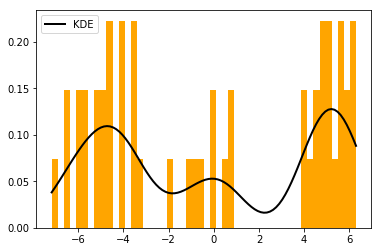

In [78]:
min_x = np.amin(min(samples).item())
max_x = np.amax(max(samples).item())
x_range = np.linspace(float(min_x), float(max_x), 100)

y = []
for x in x_range:
    y.append(kde(samples, x, 1))

plt.hist(samples.numpy(), bins=50, density=True, color='orange')
plt.plot(x_range, y, lw=2, c='black', label='KDE')
plt.legend()
plt.show()

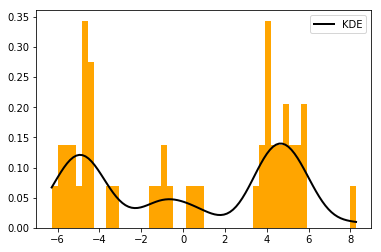

In [79]:
alt_samples = forward_model(torch.Tensor([1]), arguments)

min_x = np.amin(min(alt_samples).item())
max_x = np.amax(max(alt_samples).item())
x_range = np.linspace(float(min_x), float(max_x), 100)

y = []
for x in x_range:
    y.append(kde(alt_samples, x, 1))

plt.hist(alt_samples.numpy(), bins=50, density=True, color='orange')
plt.plot(x_range, y, lw=2, c='black', label='KDE')
plt.legend()
plt.show()

In [80]:
#distance

integral = 0
for i in range(len(alt_samples)):
    integral += pow(sqrt(kde(samples, alt_samples[i], 1)) - sqrt(kde(alt_samples, alt_samples[i], 1)), 2)

sqrt(integral)

0.22700088065451773